In [1]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import MultTaskDatasetLoader
from my_snn.utils import train, training_plots, ModelLoader
import torch
device = "cuda:0"

time_window = 50
batch_size = 128 # 128: anil kag
from torch.utils.data import DataLoader
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = MultTaskDatasetLoader(time_window, batch_size, randomness=True)
d_test = MultTaskDatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
ckpt_dir = 'addsum_tests'

data = train_loader, test_loader

def test_fn(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
            #snn.pool_delays('i', k= 10, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

delays: [0]
RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (r1_r1): Linear(in_features=128, out_features=128, bias=False)
  (r1_o): Linear(in_features=128, out_features=1, bias=False)
)
Total params: 16768
Total mult-adds (M): 0.8384
training custom_2_1_12850_RSNN_d_i_1l128_1d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 0.05510
Time elasped: 0.12099981307983398
Epoch [2/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]*image[idxb,0])


Step [1/1], Loss: 0.06544
Time elasped: 0.11497044563293457
Epoch [3/5000]
Step [1/1], Loss: 0.06309
Time elasped: 0.11400127410888672
Epoch [4/5000]
Step [1/1], Loss: 0.05028
Time elasped: 0.11600041389465332
Epoch [5/5000]
Step [1/1], Loss: 0.05205
Time elasped: 0.1139976978302002
Test set accuracy: 14.84375% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.05701
Time elasped: 0.11802983283996582
Epoch [7/5000]
Step [1/1], Loss: 0.05836
Time elasped: 0.11396980285644531
Epoch [8/5000]
Step [1/1], Loss: 0.04680
Time elasped: 0.11499977111816406
Epoch [9/5000]
Step [1/1], Loss: 0.06071
Time elasped: 0.12200140953063965
Epoch [10/5000]
Step [1/1], Loss: 0.05996
Time elasped: 0.1220402717590332
Test set accuracy: 15.625% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.05857
Time elasped: 0.1150047779083252
Epoch [12/5000]
Step [1/1], Loss: 0.05179
Time elasped: 0.1180121898651123
Epoch [13/5000]
Step [1/1], Loss: 0.05947
Time elasped: 0.11398792266845703
Epo

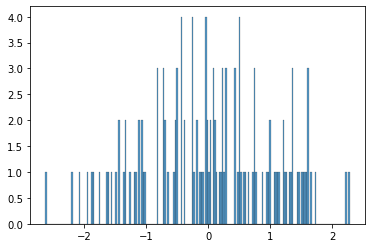

In [2]:
surr='fs'

name= f'mult_{time_window}_rnn_128_{surr}'

hidden = (128, 1, 'r')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(1,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=6400, out_features=1, bias=False)
)
Total params: 6656
Total mult-adds (M): 0.3328
training custom_2_1_12850_RSNN_d_d_1l128_50d1.t7 for 5000 epochs...
Epoch [1/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]*image[idxb,0])


Step [1/1], Loss: 0.06645
Time elasped: 0.1399993896484375
Epoch [2/5000]
Step [1/1], Loss: 0.24652
Time elasped: 0.1359999179840088
Epoch [3/5000]
Step [1/1], Loss: 0.45895
Time elasped: 0.1400001049041748
Epoch [4/5000]
Step [1/1], Loss: 0.09994
Time elasped: 0.1400012969970703
Epoch [5/5000]
Step [1/1], Loss: 0.11191
Time elasped: 0.14799904823303223
Test set accuracy: 2.34375% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.19106
Time elasped: 0.15399789810180664
Epoch [7/5000]
Step [1/1], Loss: 0.09244
Time elasped: 0.14402985572814941
Epoch [8/5000]
Step [1/1], Loss: 0.05919
Time elasped: 0.1379692554473877
Epoch [9/5000]
Step [1/1], Loss: 0.13629
Time elasped: 0.13702654838562012
Epoch [10/5000]
Step [1/1], Loss: 0.12956
Time elasped: 0.13697314262390137
Test set accuracy: 8.59375% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.05636
Time elasped: 0.13900470733642578
Epoch [12/5000]
Step [1/1], Loss: 0.08670
Time elasped: 0.13499903678894043
Epoch

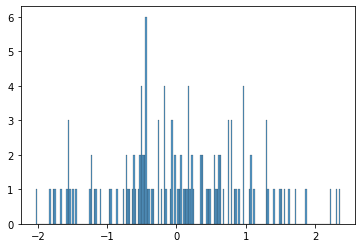

In [3]:
surr='fs'

name= f'mult_{time_window}_d_128_{surr}'

hidden = (128, 1, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(50,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_f2): Linear(in_features=6400, out_features=128, bias=False)
  (f2_o): Linear(in_features=6400, out_features=1, bias=False)
)
Total params: 825856
Total mult-adds (M): 41.2928
training custom_2_1_12850_RSNN_d_d_2l128_50d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 0.10451
Time elasped: 0.2500171661376953
Epoch [2/5000]
Step [1/1], Loss: 47.95576
Time elasped: 0.22099924087524414
Epoch [3/5000]
Step [1/1], Loss: 1.82424
Time elasped: 0.2220306396484375
Epoch [4/5000]
Step [1/1], Loss: 0.35477
Time elasped: 0.21897220611572266
Epoch [5/5000]
Step [1/1], Loss: 1.01368
Time elasped: 0.22099876403808594
Test set accuracy: 0.0% 
--------------------------
Epoch [6/5000]
Step [1/1], Lo

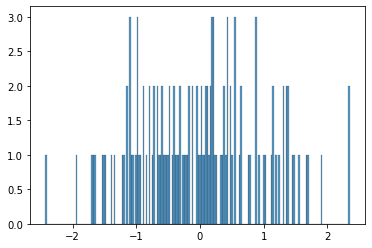

In [2]:
surr='fs'

n_h = 128

name= f'mult_{time_window}_d_{n_h}x2_{surr}'

hidden = (n_h, 2, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(50,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0]
RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (r1_r1): Linear(in_features=128, out_features=128, bias=False)
  (r1_o): Linear(in_features=128, out_features=1, bias=False)
)
Total params: 16768
Total mult-adds (M): 0.8384
training custom_2_1_12850_RSNN_d_i_1l128_1d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 0.11117
Time elasped: 0.12286090850830078
Epoch [2/5000]
Step [1/1], Loss: 0.06776
Time elasped: 0.11751151084899902
Epoch [3/5000]
Step [1/1], Loss: 0.09601
Time elasped: 0.11800026893615723
Epoch [4/5000]
Step [1/1], Loss: 0.08877
Time elasped: 0.11599969863891602
Epoch [5/5000]
Step [1/1], Loss: 0.07257
Time elasped: 0.11600065231323242
Test set accuracy: 11.71875% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.07320
Time elasped: 0.12199926376342773
Epoch [7/5000]
Step [1/1], Loss: 0.07102
Time elasped: 0.11699962615966797
Epoch [8/5000]
Step [1/1], Loss: 0.06850
Time elasped: 0.12699985

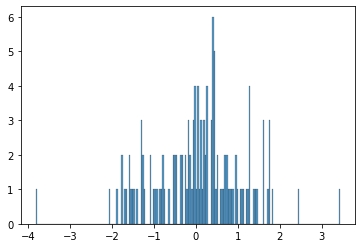

In [3]:
surr='fs'

n_h = 128

name= f'mult_{time_window}_rnn_{n_h}x2_{surr}'

hidden = (n_h, 1, 'r')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(1,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

In [1]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import MultTaskDatasetLoader
from my_snn.utils import train, training_plots, ModelLoader
import torch
device = "cuda:0"

time_window = 500
batch_size = 128 # 128: anil kag
from torch.utils.data import DataLoader
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = MultTaskDatasetLoader(time_window, batch_size, randomness=True)
d_test = MultTaskDatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
ckpt_dir = 'addsum_tests'

data = train_loader, test_loader

def test_fn(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
            #snn.pool_delays('i', k= 10, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

delays: [0]
RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (r1_r1): Linear(in_features=128, out_features=128, bias=False)
  (r1_o): Linear(in_features=128, out_features=1, bias=False)
)
Total params: 16768
Total mult-adds (M): 8.384
training custom_2_1_128500_RSNN_d_i_1l128_1d1.t7 for 5000 epochs...
Epoch [1/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]*image[idxb,0])


Step [1/1], Loss: 0.13271
Time elasped: 1.0670013427734375
Epoch [2/5000]
Step [1/1], Loss: 0.06733
Time elasped: 1.014002799987793
Epoch [3/5000]
Step [1/1], Loss: 0.06635
Time elasped: 0.9850263595581055
Epoch [4/5000]
Step [1/1], Loss: 0.10747
Time elasped: 0.966001033782959
Epoch [5/5000]
Step [1/1], Loss: 0.07155
Time elasped: 0.9559996128082275
Test set accuracy: 14.84375% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.04829
Time elasped: 0.9710581302642822
Epoch [7/5000]
Step [1/1], Loss: 0.06494
Time elasped: 0.9580004215240479
Epoch [8/5000]
Step [1/1], Loss: 0.06176
Time elasped: 0.9690301418304443
Epoch [9/5000]
Step [1/1], Loss: 0.05957
Time elasped: 0.9829690456390381
Epoch [10/5000]
Step [1/1], Loss: 0.05425
Time elasped: 0.9870009422302246
Test set accuracy: 7.8125% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.05855
Time elasped: 0.9980390071868896
Epoch [12/5000]
Step [1/1], Loss: 0.05934
Time elasped: 0.9879989624023438
Epoch [13/5000

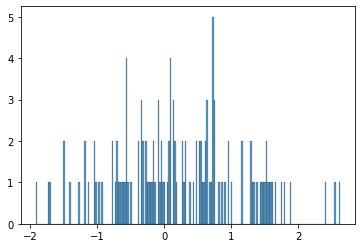

In [5]:
surr='fs'

name= f'mult_{time_window}_rnn_128_{surr}'

hidden = (128, 1, 'r')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(1,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=6400, out_features=1, bias=False)
)
Total params: 6656
Total mult-adds (M): 3.328
training custom_2_1_128500_RSNN_d_d_1l128_50d1.t7 for 5000 epochs...
Epoch [1/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]*image[idxb,0])


Step [1/1], Loss: 0.15759
Time elasped: 1.6720001697540283
Epoch [2/5000]
Step [1/1], Loss: 1.48911
Time elasped: 1.5879991054534912
Epoch [3/5000]
Step [1/1], Loss: 0.23809
Time elasped: 1.597010612487793
Epoch [4/5000]
Step [1/1], Loss: 0.26289
Time elasped: 1.5870330333709717
Epoch [5/5000]
Step [1/1], Loss: 0.80784
Time elasped: 1.57899808883667
Test set accuracy: 0.78125% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.46324
Time elasped: 1.5939993858337402
Epoch [7/5000]
Step [1/1], Loss: 0.06488
Time elasped: 1.5910007953643799
Epoch [8/5000]
Step [1/1], Loss: 0.19517
Time elasped: 1.6380810737609863
Epoch [9/5000]
Step [1/1], Loss: 0.44063
Time elasped: 1.5860748291015625
Epoch [10/5000]
Step [1/1], Loss: 0.44335
Time elasped: 1.5918285846710205
Test set accuracy: 3.90625% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.23075
Time elasped: 1.612619161605835
Epoch [12/5000]
Step [1/1], Loss: 0.04727
Time elasped: 1.595567226409912
Epoch [13/5000]
S

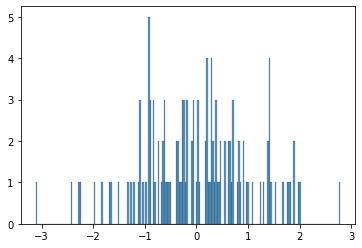

In [2]:
surr='fs'

name= f'mult_{time_window}_d_128_{surr}'

hidden = (128, 1, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(50,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)